In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/mall_customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
from sklearn import preprocessing

In [5]:
le_gender = preprocessing.LabelEncoder()
df['Gender2'] = le_gender.fit_transform(df['Gender'])

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender2
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [7]:
df = df[['Age', 'Annual Income (k$)' , 'Spending Score (1-100)', 'Gender2']]
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender2
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [8]:
scaler = preprocessing.StandardScaler()
df_1 = scaler.fit_transform(df)

In [10]:
df_1[:10]

array([[-1.42456879, -1.73899919, -0.43480148,  1.12815215],
       [-1.28103541, -1.73899919,  1.19570407,  1.12815215],
       [-1.3528021 , -1.70082976, -1.71591298, -0.88640526],
       [-1.13750203, -1.70082976,  1.04041783, -0.88640526],
       [-0.56336851, -1.66266033, -0.39597992, -0.88640526],
       [-1.20926872, -1.66266033,  1.00159627, -0.88640526],
       [-0.27630176, -1.62449091, -1.71591298, -0.88640526],
       [-1.13750203, -1.62449091,  1.70038436, -0.88640526],
       [ 1.80493225, -1.58632148, -1.83237767,  1.12815215],
       [-0.6351352 , -1.58632148,  0.84631002, -0.88640526]])

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA(n_components=2)
x = pca.fit_transform(df_1)
x[:10]

array([[-0.40638272, -0.52071363],
       [-1.42767287, -0.3673102 ],
       [ 0.05076057, -1.89406774],
       [-1.6945131 , -1.63190805],
       [-0.31310838, -1.81048272],
       [-1.71744627, -1.59926418],
       [ 0.79082112, -1.94727112],
       [-2.14832159, -1.50537369],
       [ 2.77428623, -0.88298767],
       [-1.21629477, -1.61640464]])

In [13]:
df_reduced = pd.DataFrame(x)
df_reduced.columns = ['P1','P2']

In [14]:
df_reduced.head()

,P1,P2
0,-0.406383,-0.520714
1,-1.427673,-0.367310
2,0.050761,-1.894068
3,-1.694513,-1.631908
4,-0.313108,-1.810483


<Axes: xlabel='P1', ylabel='P2'>

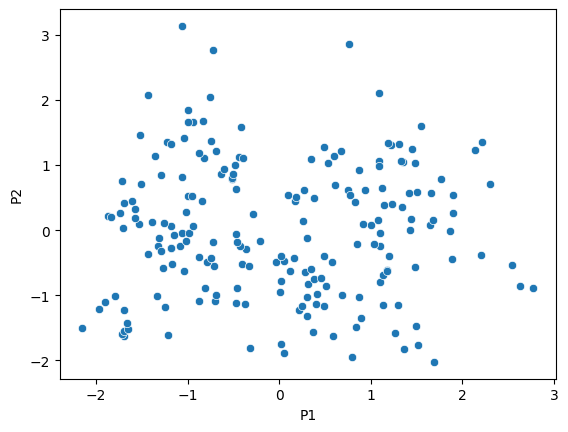

In [15]:
import seaborn as sns
sns.scatterplot(data=df_reduced, x='P1', y='P2' )

In [16]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 5)
model.fit( df_reduced )

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [17]:
model.labels_

array([1, 4, 1, 4, 1, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1, 4, 0, 4, 1, 4,
       0, 4, 0, 4, 1, 1, 1, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1, 4, 0, 4, 2, 4,
       0, 4, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0, 4, 2, 2, 3, 0, 1, 2, 3,
       1, 0, 3, 1, 2, 1, 0, 1, 2, 3, 1, 2, 4, 1, 2, 2, 2, 1, 4, 2, 1, 4,
       4, 1, 0, 3, 2, 1, 1, 3, 1, 4, 2, 3, 4, 1, 2, 3, 2, 4, 0, 2, 2, 2,
       2, 4, 1, 3, 4, 4, 0, 1, 1, 1, 3, 1, 1, 3, 1, 4, 2, 3, 2, 3, 2, 3,
       1, 4, 2, 4, 0, 3, 2, 4, 0, 3, 1, 4, 2, 3, 2, 4, 1, 3, 2, 3, 0, 4,
       0, 4, 2, 4, 2, 4, 0, 4, 2, 4, 2, 4, 2, 4, 1, 3, 2, 3, 2, 3, 2, 4,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

In [19]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

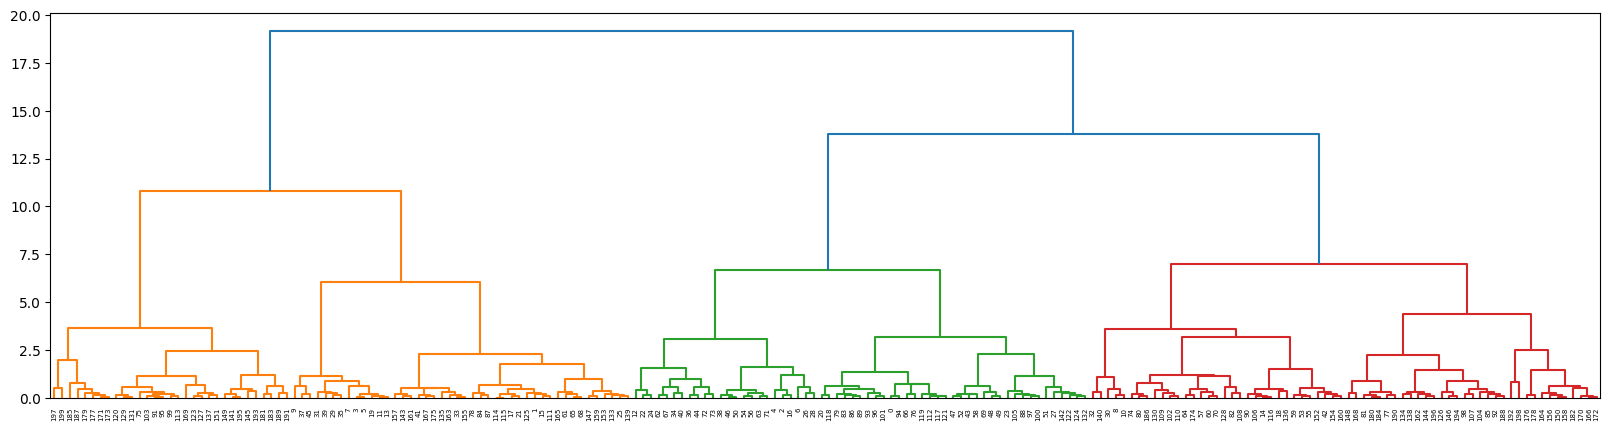

In [23]:
plt.figure(figsize=(20,5))
den = shc.dendrogram( shc.linkage( df_reduced , method='ward' ) )
plt.show()